In [9]:
from Dataset import *
import cupy as cp
from bpnn_cuda import BPNN

def convert_categories(y_cat):
    desired = cp.array([0 if y[0] == 1 else 1 for y in y_cat])
    return desired

def get_data():
    d = Dataset.load_gzip(os.path.join("datasets", "face_mask_pickled"), "dataset_gray_conv.pkl.gzip")

    ndimen = d.train.X.shape[1]

    # Structure Training Data for BPNN
    training_inputs = [cp.reshape(cp.asarray(x), (ndimen, 1)) for x in d.train.X]
    training_results = [cp.asarray(y.reshape(-1, 1)) for y in d.train.y]

    training_data = zip(training_inputs, training_results)
    # Structure Validation Data for BPNN
    validation_inputs = [cp.reshape(cp.asarray(x), (ndimen, 1)) for x in d.validation.X]
    validation_data = zip(validation_inputs, convert_categories(d.validation.y))
    # Structure Testing Data for BPNN
    testing_inputs = [cp.reshape(cp.asarray(x), (ndimen, 1)) for x in d.test.X]
    testing_data = zip(testing_inputs, convert_categories(d.test.y))

    return training_data, validation_data, testing_data, ndimen


training_data, validation_data, testing_data, ndimen = get_data()
print(f"Input Dimension: {ndimen}")

ntrials = 1
max_epochs = 100
init_nc = [ndimen, 200, 2]
init_b = 40
init_lr = 0.5


model_BPNN = BPNN(init_nc, verbose=True)
final_score, eval_scores, eval_scores_deltas, conv_time = model_BPNN.train(training_data,
                                                                           max_epochs=max_epochs,
                                                                           batch_size=init_b,
                                                                           learning_rate=init_lr,
                                                                           evaluation_data=validation_data)

# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip
Input Dimension: 3481
# Training MLP Network: Sizes=[3481, 200, 2]	Epochs=100	Batch-Size=40	Learning-Rate=0.5
 - Training Data Len: 10000
 - Validation Data Len: 800
# Epochs:


  1%|          | 1/100 [00:05<08:22,  5.08s/it]

	1. Correct 494/800	(score: 0.6175	delta: 0.6175	delta_avg: 0.6175)


  2%|▏         | 2/100 [00:10<08:17,  5.07s/it]

	2. Correct 528/800	(score: 0.66	delta: 0.04249999999999998	delta_avg: 0.33)


  3%|▎         | 3/100 [00:15<08:12,  5.08s/it]

	3. Correct 544/800	(score: 0.68	delta: 0.020000000000000018	delta_avg: 0.22666666666666668)


  4%|▍         | 4/100 [00:20<08:07,  5.08s/it]

	4. Correct 549/800	(score: 0.68625	delta: 0.006249999999999978	delta_avg: 0.1715625)


  5%|▌         | 5/100 [00:25<08:02,  5.08s/it]

	5. Correct 555/800	(score: 0.69375	delta: 0.007499999999999951	delta_avg: 0.13874999999999998)


  6%|▌         | 6/100 [00:30<07:57,  5.08s/it]

	6. Correct 562/800	(score: 0.7025	delta: 0.008750000000000036	delta_avg: 0.11708333333333333)


  7%|▋         | 7/100 [00:35<07:52,  5.08s/it]

	7. Correct 559/800	(score: 0.69875	delta: -0.003750000000000031	delta_avg: 0.09982142857142857)


  8%|▊         | 8/100 [00:40<07:48,  5.09s/it]

	8. Correct 578/800	(score: 0.7225	delta: 0.02375000000000005	delta_avg: 0.0903125)


  9%|▉         | 9/100 [00:45<07:46,  5.13s/it]

	9. Correct 592/800	(score: 0.74	delta: 0.01749999999999996	delta_avg: 0.08222222222222222)


 10%|█         | 10/100 [00:51<07:50,  5.23s/it]

	10. Correct 590/800	(score: 0.7375	delta: -0.0024999999999999467	delta_avg: 0.07375000000000001)


 11%|█         | 11/100 [00:56<07:42,  5.20s/it]

	11. Correct 577/800	(score: 0.72125	delta: -0.016250000000000098	delta_avg: 0.06556818181818182)


 12%|█▏        | 12/100 [01:01<07:35,  5.17s/it]

	12. Correct 588/800	(score: 0.735	delta: 0.01375000000000004	delta_avg: 0.06125)


 13%|█▎        | 13/100 [01:06<07:30,  5.18s/it]

	13. Correct 591/800	(score: 0.73875	delta: 0.003750000000000031	delta_avg: 0.05682692307692308)


 14%|█▍        | 14/100 [01:11<07:20,  5.13s/it]

	14. Correct 582/800	(score: 0.7275	delta: -0.011249999999999982	delta_avg: 0.05196428571428572)


 15%|█▌        | 15/100 [01:16<07:13,  5.11s/it]

	15. Correct 605/800	(score: 0.75625	delta: 0.028749999999999942	delta_avg: 0.050416666666666665)


 16%|█▌        | 16/100 [01:21<07:09,  5.11s/it]

	16. Correct 621/800	(score: 0.77625	delta: 0.020000000000000018	delta_avg: 0.048515625)


 17%|█▋        | 17/100 [01:27<07:04,  5.11s/it]

	17. Correct 619/800	(score: 0.77375	delta: -0.0024999999999999467	delta_avg: 0.04551470588235294)


 18%|█▊        | 18/100 [01:32<07:03,  5.16s/it]

	18. Correct 601/800	(score: 0.75125	delta: -0.022500000000000075	delta_avg: 0.04173611111111111)


 19%|█▉        | 19/100 [01:37<06:53,  5.10s/it]

	19. Correct 607/800	(score: 0.75875	delta: 0.007500000000000062	delta_avg: 0.039934210526315794)


 20%|██        | 20/100 [01:42<06:43,  5.05s/it]

	20. Correct 604/800	(score: 0.755	delta: -0.003750000000000031	delta_avg: 0.03775)


 21%|██        | 21/100 [01:47<06:34,  5.00s/it]

	21. Correct 626/800	(score: 0.7825	delta: 0.02749999999999997	delta_avg: 0.03726190476190476)


 22%|██▏       | 22/100 [01:52<06:31,  5.01s/it]

	22. Correct 617/800	(score: 0.77125	delta: -0.011249999999999982	delta_avg: 0.03505681818181818)


Training Epoch vs. Accuracy (Effect of Network Configuration)
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [02:28<00:00,  4.94s/it]


[3481, 50, 2] => 0.75375
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [02:29<00:00,  4.98s/it]


[3481, 100, 2] => 0.7675
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [02:27<00:00,  4.93s/it]


[3481, 200, 2] => 0.80375
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [02:37<00:00,  5.24s/it]


[3481, 400, 2] => 0.7725
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [02:32<00:00,  5.09s/it]


[3481, 800, 2] => 0.8075
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [04:50<00:00,  9.67s/it]


[3481, 1600, 2] => 0.81
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [09:04<00:00, 18.16s/it]


[3481, 3200, 2] => 0.78625
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:15<00:00, 22.52s/it]

[3481, 4000, 2] => 0.82375


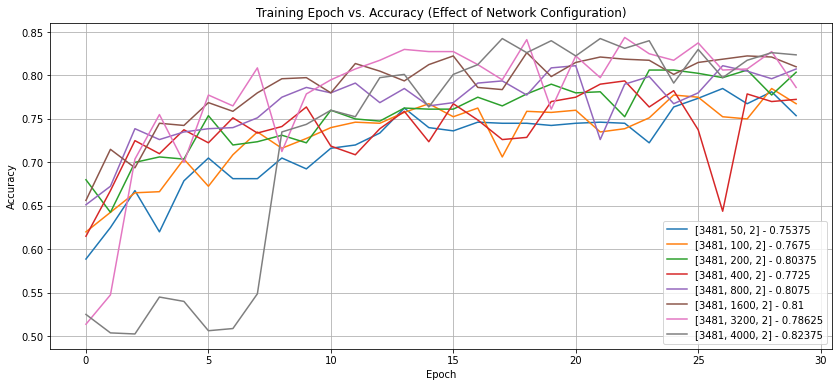

In [ ]:
def plot_accuracies_hidden_layers_and_nodes(save_dir, layers_arr):
    os.makedirs(save_dir, exist_ok=True)
    print(f"Training Epoch vs. Accuracy (Effect of Network Configuration)")

    fig = plt.figure(figsize=(14, 6))
    plt.title(
        f"Training Epoch vs. Accuracy (Effect of Network Configuration)")
    plt.xlabel("Epoch")
    plt.ylabel('Accuracy')

    best_score = 0
    best_config = None

    for layers in layers_arr:
        final_scores = []
        epoch_scores = []
        # Run an average over multiple trials
        for i in range(ntrials):
            # Get data and train the network
            training_data, validation_data, testing_data, ndimen = get_data()
            nn = BPNN(layers, verbose=False)
            final_score, eval_scores, eval_scores_deltas, conv_time = nn.train(training_data,
                                                                               max_epochs=max_epochs,
                                                                               batch_size=init_b,
                                                                               learning_rate=init_lr,
                                                                               evaluation_data=validation_data,
                                                                               evaluation_treshold=None)
            final_scores.append(final_score)
            epoch_scores.append(eval_scores)

        # Compute the averages over the specified number of trials
        final_score_avg = np.average(final_scores)
        epoch_scores = np.mean(epoch_scores, axis=0)

        print(f'{layers} => {final_score_avg}')
        if final_score_avg > best_score:
            best_score = final_score_avg
            best_config = layers
        plt.plot(epoch_scores, label=f'{layers} - {final_score_avg}')

    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig(f'{save_dir}/bpnn_layers_vs_acc', dpi=100)

    return best_config


layers_arr = [[ndimen, 50, 2],
              [ndimen, 100, 2],
              [ndimen, 200, 2],
              [ndimen, 400, 2],
              [ndimen, 800, 2],
              [ndimen, 1600, 2],
              [ndimen, 3200, 2],
              [ndimen, 4000, 2]]


"""
# Generate all possible network combinations with the following criteria:
# - Minimum number of hidden layers: 1
# - Maximum number of hidden layers: 10
# - Minimum number of nodes in each hidden layer: 32
# - Maximum number of nodes in each hidden layer: 1024
# - Increments of 32
"""




best_nc = plot_accuracies_hidden_layers_and_nodes("img", layers_arr)
print(f"Best network configuration: {best_nc}")


Training Epoch vs. Accuracy (Effect of Batch Size)
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [12:45<00:00, 25.52s/it]


5 => 0.5
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:55<00:00, 23.86s/it]


10 => 0.5
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:39<00:00, 23.30s/it]


15 => 0.5025
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:30<00:00, 23.03s/it]


20 => 0.78625
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:18<00:00, 22.61s/it]


40 => 0.84625
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:11<00:00, 22.40s/it]


80 => 0.8075
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:10<00:00, 22.36s/it]


100 => 0.8125
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:09<00:00, 22.32s/it]


125 => 0.82375
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:09<00:00, 22.30s/it]


150 => 0.79
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:08<00:00, 22.27s/it]


200 => 0.77375
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:07<00:00, 22.26s/it]


250 => 0.77125
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:07<00:00, 22.24s/it]


300 => 0.71875
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:07<00:00, 22.23s/it]


350 => 0.71875
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:06<00:00, 22.23s/it]


400 => 0.64375
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:06<00:00, 22.23s/it]


450 => 0.7125
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [11:06<00:00, 22.22s/it]

500 => 0.645


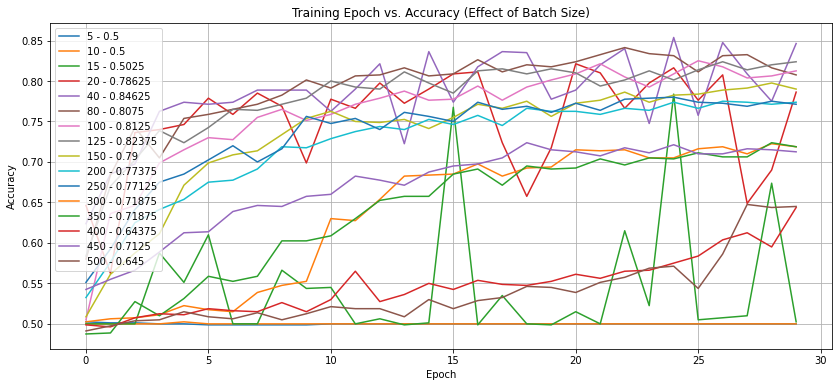

In [ ]:
def plot_accuracies_mini_batch_size(save_dir, batch_size_arr):
    os.makedirs(save_dir, exist_ok=True)
    print(f"Training Epoch vs. Accuracy (Effect of Batch Size)")

    fig = plt.figure(figsize=(14, 6))
    plt.title(f"Training Epoch vs. Accuracy (Effect of Batch Size)")
    plt.xlabel("Epoch")
    plt.ylabel('Accuracy')

    best_score = 0
    best_config = None

    for batch_size in batch_size_arr:
        final_scores = []
        epoch_scores = []
        # Run an average over multiple trials
        for i in range(ntrials):
            # Get data and train the network
            training_data, validation_data, testing_data, ndimen = get_data()
            nn = BPNN(best_nc, verbose=False)
            final_score, eval_scores, eval_scores_deltas, conv_time = nn.train(training_data,
                                                                               max_epochs=max_epochs,
                                                                               batch_size=batch_size,
                                                                               learning_rate=init_lr,
                                                                               evaluation_data=validation_data,
                                                                               evaluation_treshold=None)
            final_scores.append(final_score)
            epoch_scores.append(eval_scores)

        # Compute the averages over the specified number of trials
        final_score_avg = np.average(final_scores)
        epoch_scores = np.mean(epoch_scores, axis=0)

        print(f'{batch_size} => {final_score_avg}')
        if final_score_avg > best_score:
            best_score = final_score_avg
            best_config = batch_size
        plt.plot(epoch_scores, label=f'{batch_size} - {final_score_avg}')

    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig(f'{save_dir}/bpnn_batch_vs_acc', dpi=100)

    return best_config


batch_size_arr = [20, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
best_b = plot_accuracies_mini_batch_size("img", batch_size_arr)
print(f"Best batch size: {best_b}")

Training Epoch vs. Accuracy (Effect of Learning Rate)
Training Epoch vs. Accuracy (Effect of Learning Rate)
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [12:30<00:00, 25.02s/it]


3 => 0.5
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [13:52<00:00, 27.74s/it]


2 => 0.66
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [12:49<00:00, 25.64s/it]


1 => 0.5575
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [12:20<00:00, 24.69s/it]


0.5 => 0.83625
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [12:23<00:00, 24.77s/it]


0.25 => 0.50375
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [12:56<00:00, 25.88s/it]


0.1 => 0.675
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [13:00<00:00, 26.00s/it]


0.05 => 0.6075
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [12:55<00:00, 25.84s/it]


0.025 => 0.505
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [12:53<00:00, 25.80s/it]


0.01 => 0.50375
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [12:44<00:00, 25.47s/it]


0.005 => 0.50375
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [12:53<00:00, 25.79s/it]


0.0025 => 0.51375
# Loading from Gzip Pickle File: datasets/face_mask_pickled/dataset_gray_conv.pkl.gzip


100%|██████████| 30/30 [13:14<00:00, 26.49s/it]

0.001 => 0.50125


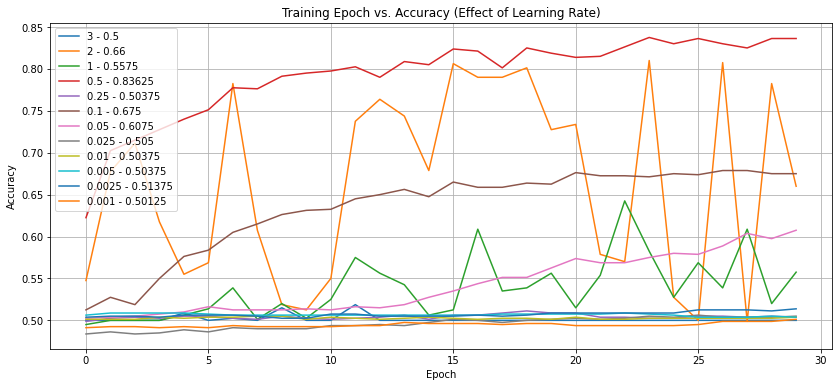

In [ ]:
def plot_accuracies_learning_rate(save_dir, learning_rate_arr):
    os.makedirs(save_dir, exist_ok=True)
    print(f"Training Epoch vs. Accuracy (Effect of Learning Rate)")
    print(f"Training Epoch vs. Accuracy (Effect of Learning Rate)")

    fig = plt.figure(figsize=(14, 6))
    plt.title(f"Training Epoch vs. Accuracy (Effect of Learning Rate)")
    plt.xlabel("Epoch")
    plt.ylabel('Accuracy')

    best_score = 0
    best_config = None

    for learning_rate in learning_rate_arr:
        final_scores = []
        epoch_scores = []
        # Run an average over multiple trials
        for i in range(ntrials):
            # Get data and train the network
            training_data, validation_data, testing_data, ndimen = get_data()
            nn = BPNN(best_nc, verbose=False)
            final_score, eval_scores, eval_scores_deltas, conv_time = nn.train(training_data,
                                                                               max_epochs=max_epochs,
                                                                               batch_size=best_b,
                                                                               learning_rate=learning_rate,
                                                                               evaluation_data=validation_data,
                                                                               evaluation_treshold=None)

            final_scores.append(final_score)
            epoch_scores.append(eval_scores)

        # Compute the averages over the specified number of trials
        final_score_avg = np.average(final_scores)
        epoch_scores = np.mean(epoch_scores, axis=0)

        print(f'{learning_rate} => {final_score_avg}')
        if final_score_avg > best_score:
            best_score = final_score_avg
            best_config = learning_rate

        plt.plot(epoch_scores, label=f'{learning_rate} - {final_score_avg}')

    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig(f'{save_dir}/bpnn_lr_vs_acc', dpi=100)

    return best_config


learning_rate_arr = [0.75, 0.65, 0.60, 0.55, 0.5, 0.45, 0.40, 0.35, 0.25]
best_lr = plot_accuracies_learning_rate("img", learning_rate_arr)
print(f"Best learning rate: {best_lr}")

In [ ]:
"""
Plot the convergence curve of BPNN
"""

training_data, validation_data, testing_data, ndimen = get_data()

nn = BPNN(best_nc, verbose=True)
final_score, eval_scores, eval_scores_deltas, nn_conv_time = nn.train(training_data,
                                                                      max_epochs=max_epochs,
                                                                      batch_size=best_b,
                                                                      learning_rate=best_lr,
                                                                      evaluation_data=validation_data,
                                                                      evaluation_treshold=None)

fig = plt.figure(figsize=(14, 6))

plt.title(f"Training Epoch vs. Accuracy with (Final Model)")
plt.xlabel("Epoch")
plt.ylabel('Accuracy')

plt.plot(eval_scores, label='Convergence Curve')

plt.grid()
plt.legend()
plt.show()
fig.savefig(f'img/bpnn_best_model', dpi=100)

acc = 0
acc0 = 0
len0 = 0
acc1 = 0
len1 = 0

for (x, y) in testing_data:
    decision = np.argmax(nn.feedforward(x))

    if decision == y:
        acc += 1
    if y == 0:
        len0 += 1
        if decision == y:
            acc0 += 1
    if y == 1:
        len1 += 1
        if decision == y:
            acc1 += 1

nn_acc = acc / (len0 + len1)
# Compute class accuracies
nn_acc0 = acc0 / len0
nn_acc1 = acc1 / len1

print(f'Overall Testing Accuracy: {nn_acc}')
print(f'Class 0 Testing Accuracy: {nn_acc0}')
print(f'Class 1 Testing Accuracy: {nn_acc1}')
